In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionResNetV2
#from keras.applications.inception_v3 import InceptionV3
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

/Users/hardika/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import os
import time
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

/Users/hardika/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
PATH = os.getcwd()

In [4]:
data_path = PATH + '/FULL_FACE_TRAIN'

In [5]:
data_dir_list = os.listdir(data_path)

In [6]:
img_data_list=[]

In [7]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(299, 299))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		#print('Input image shape:', x.shape)
		img_data_list.append(x)   

Loaded the images of dataset-Surprise face cropped

Loaded the images of dataset-Disgust face cropped

Loaded the images of dataset-Happy face cropped

Loaded the images of dataset-Contempt face cropped

Loaded the images of dataset-Angry face cropped

Loaded the images of dataset-Sad face cropped

Loaded the images of dataset-Fear face cropped



In [8]:
img_data = np.array(img_data_list) # takes time"
        
        # To bring data in the form (no. of images, row, col, channels)
        #print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]
       # print (img_data.shape) 

In [9]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [10]:
labels[0:540]=0
labels[540:880]=1
labels[880:1495]=2
labels[1495:1611]=3
labels[1611:2043]=4
labels[2043:2363]=5
labels[2363:2600]=6

In [11]:
names = ['Surprised face','Sad face','Happy face','Fear face','Disgust face','Contempt face','Angry face']

In [12]:
Y = np_utils.to_categorical(labels, num_classes)

In [13]:
x,y = shuffle(img_data,Y, random_state=2) # TAKES TIME 
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2) 

# MODEL

In [14]:
image_input = Input(shape=(299, 299, 3))
#model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape = (299, 299, 3))
model = InceptionResNetV2(include_top = False, weights = "imagenet", input_tensor = image_input, input_shape = (299, 299, 3), classes = 7)
model.summary() 


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

#model = InceptionResNetV2(input_tensor=image_input, weights='imagenet', include_top=True)

model.summary() 


In [15]:
last_layer = model.get_layer('predictions').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_incep_model = Model(image_input, out)
custom_incep_model.summary()


ValueError: No such layer: predictions

In [45]:
#for layer in InceptionResNetV2.layers[:-1]:
#	layer.trainable = False

#InceptionResNetV2.layers[3].trainable

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [46]:
t=time.time()
#	t = now()
hist = model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_incep_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1820 samples, validate on 780 samples
Epoch 1/1
1820/1820 [==============================] - 1618s 889ms/step - loss: 1.8871 - acc: 0.2324 - val_loss: 1.8852 - val_acc: 0.2462
Training time: -1618.5254967212677
780/780 [==============================] - 620s 794ms/step
[INFO] loss=1.8852, accuracy: 24.6154%


In [47]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

import numpy as np
import os
import time
from keras.preprocessing import image
from imagenet_utils import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

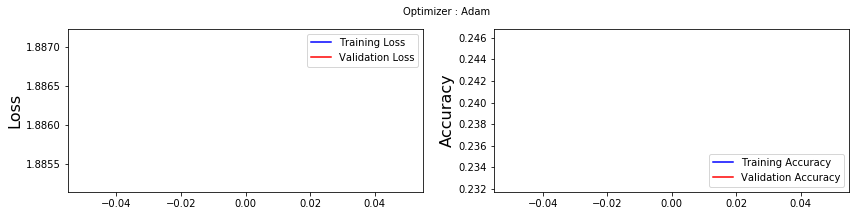

In [48]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [50]:
Y_pred = custom_incep_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)


In [31]:
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=names))

                precision    recall  f1-score   support

Surprised face       0.00      0.00      0.00       157
      Sad face       0.00      0.00      0.00        96
    Happy face       0.25      1.00      0.40       192
     Fear face       0.00      0.00      0.00        33
  Disgust face       0.00      0.00      0.00       122
 Contempt face       0.00      0.00      0.00       113
    Angry face       0.00      0.00      0.00        67

   avg / total       0.06      0.25      0.10       780



/Users/hardika/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       # cm=round(cm,3)
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0   0 157   0   0   0   0]
 [  0   0  96   0   0   0   0]
 [  0   0 192   0   0   0   0]
 [  0   0  33   0   0   0   0]
 [  0   0 122   0   0   0   0]
 [  0   0 113   0   0   0   0]
 [  0   0  67   0   0   0   0]]


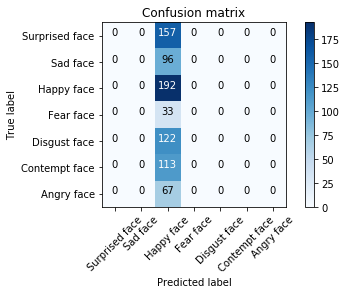

KeyboardInterrupt: 

In [33]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
plot_confusion_matrix(cnf_matrix, classes=names, normalize=False,title='Confusion matrix')
#plt.figure()
plt.show()

# STORING THE WEIGHTS
fname="Weights-7class.hdf5"
custom_incep_model.save_weights(fname,overwrite=True)


#  LOADING WEIGHTS
fname= "Weights7class.hdf5"
custom_incep_model.load_weights(fname)
        